<a href="https://colab.research.google.com/github/Ridham-Shah-25/Boston-Housing/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Relevant Libraries**

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
var = load_boston()
print(var.keys())
print(var.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

**Creating a Pandas Dataframe,Exploring The Dataset and adding another value to store Target attribute in it**

In [ ]:
df = pd.DataFrame(var.data, columns=var.feature_names)
print(df.describe())
print(df.head())
print(df.tail())
df['MEDV'] = var.target
print(df.head())
df.info()
df.isnull().sum()

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

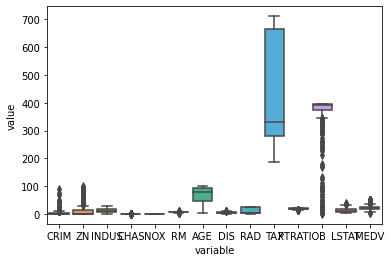

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

**Creating a heatmap to find correlation between different features and labels**

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

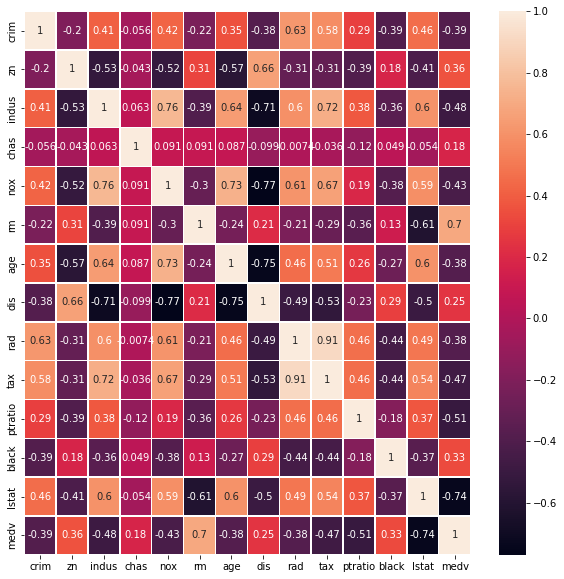

In [ ]:
data=pd.read_csv('Boston1.csv')
print(data.corr())
fig, ax = plt.subplots(figsize=(10,10))
dataplot=sns.heatmap(data.corr(),annot=True,linewidths=.5,ax=ax)
plt.show()

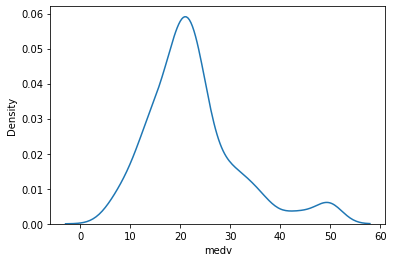

In [ ]:
sns.kdeplot(data=data,x="medv")

**Normalizing the Dataset**

In [ ]:
import sklearn
from sklearn import preprocessing
housing = pd.read_csv("Boston1.csv")
scaler = preprocessing.MinMaxScaler()
names = housing.columns
d = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(d, columns=names)
print(scaled_df)

         crim    zn     indus  chas       nox        rm       age       dis  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          rad       tax   ptratio     black     lst

**Deciding the features to be used for prediction using the heatmap and training the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = pd.DataFrame(np.c_[scaled_df['nox'],scaled_df['rm'],scaled_df['dis'],scaled_df['lstat'],scaled_df['ptratio']], columns = ['nox','rm','dis','lstat','ptratio'])
Y = scaled_df['medv']
# print(X)
# print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,random_state = 5 )
X_train.head()


,nox,rm,dis,lstat,ptratio
33,0.314815,0.410040,0.241668,0.458609,0.893617
283,0.032922,0.835792,0.432431,0.039459,0.106383
418,0.604938,0.459092,0.061199,0.521247,0.808511
502,0.386831,0.490324,0.105293,0.202815,0.893617
402,0.633745,0.544740,0.046322,0.512693,0.808511


**Linear Regression**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df
# from sklearn.linear_model import LinearRegression as lm
# model=lm().fit(X_train,Y_train)
# predictions=model.predict(X_test)
# plt.scatter(Y_test,predictions)
# plt.xlabel('True values')
# plt.ylabel('Predictions')
# plt.show()

0.5887348281094947
[-0.16370469  0.4258583  -0.28074036 -0.53682503 -0.21752147]


,Actual,Predicted
226,0.724444,0.729058
292,0.508889,0.531891
90,0.391111,0.511433
373,0.195556,-0.063273
273,0.671111,0.605801
...,...,...
349,0.480000,0.428014
212,0.386667,0.321892
156,0.180000,0.287101
480,0.400000,0.390070


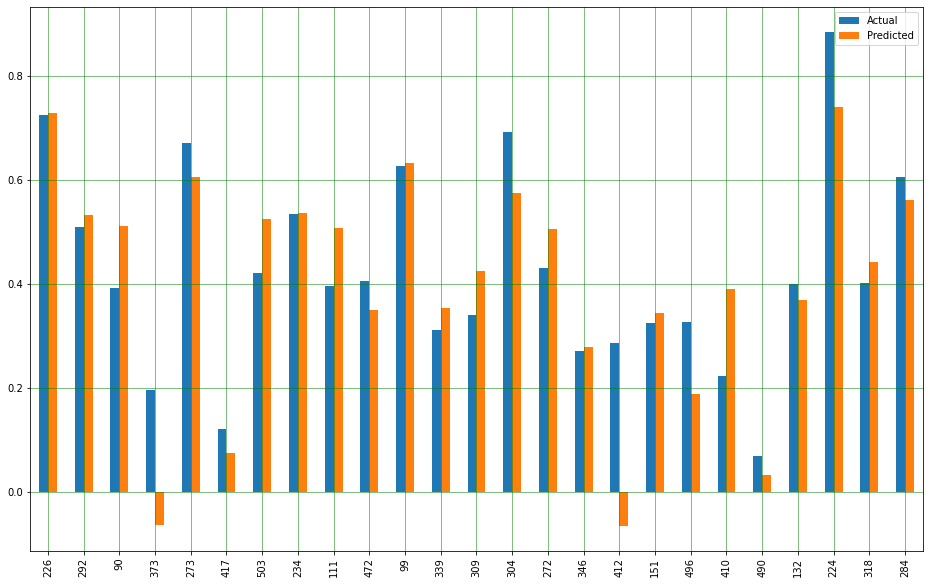

In [ ]:
#Comparing the result as a bar graph
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,y_pred))
print(metrics.mean_squared_error(Y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

0.07369939992954587
0.009983651727405446
0.09991822520143884


**Displaying The R2 Score to calculate Linear Regression Model Accuracy**

In [ ]:
print(metrics.r2_score(Y_test,y_pred))

0.7417818906824027


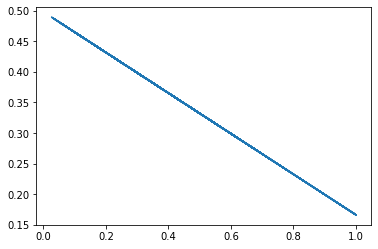

In [ ]:
x1 = np.array(X_test['nox'])
y1 = np.array(y_pred)
m,b=np.polyfit(x1,y1,1)
plt.plot(x1, m*x1 + b)

**SVM Regressor Model**

In [ ]:

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [ ]:
Y_test

226    0.724444
292    0.508889
90     0.391111
373    0.195556
273    0.671111
         ...   
349    0.480000
212    0.386667
156    0.180000
480    0.400000
248    0.433333
Name: medv, Length: 102, dtype: float64

In [ ]:
y_pred

array([0.87202363, 0.55128493, 0.47015745, 0.14791015, 0.68191837,
       0.09239494, 0.59265845, 0.49495935, 0.47458983, 0.28712261,
       0.689541  , 0.3188604 , 0.38239763, 0.60078005, 0.47735537,
       0.32808584, 0.21002254, 0.31862644, 0.23734131, 0.51621735,
       0.16890199, 0.37997981, 0.87995534, 0.38321321, 0.58221678,
       0.10141192, 0.4192016 , 0.38673604, 0.38905471, 0.46871351,
       0.24645348, 0.16342975, 0.24166467, 0.21689092, 0.47023655,
       0.33965225, 0.43329769, 0.11395796, 0.87791082, 0.66441413,
       0.28206335, 0.18004278, 0.50423448, 0.17092066, 0.47889438,
       0.56480989, 0.18173756, 0.27805823, 0.34581765, 0.13245758,
       0.30645112, 0.32249392, 0.44214115, 0.24733022, 0.30321965,
       0.43997333, 0.81008708, 0.1931941 , 0.52432202, 0.3102814 ,
       0.31733703, 0.37711708, 0.21477267, 0.73280036, 0.37767312,
       0.14893679, 0.28984787, 0.40595582, 0.41314578, 0.33349303,
       0.21073123, 0.52659078, 0.31786012, 0.21284098, 0.44988

In [ ]:
df1 = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':y_pred})
df1

,Real Values,Predicted Values
226,0.724444,0.872024
292,0.508889,0.551285
90,0.391111,0.470157
373,0.195556,0.147910
273,0.671111,0.681918
...,...,...
349,0.480000,0.547378
212,0.386667,0.351873
156,0.180000,0.282628
480,0.400000,0.348222


**Displaying The R2 Score to calculate SVM Regressor Model Accuracy**

In [ ]:
print(metrics.mean_absolute_error(Y_test,y_pred))
print(metrics.mean_squared_error(Y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print(metrics.r2_score(Y_test,y_pred))

0.0545116686661115
0.005726441609167195
0.0756732555739952
0.8518907744570283


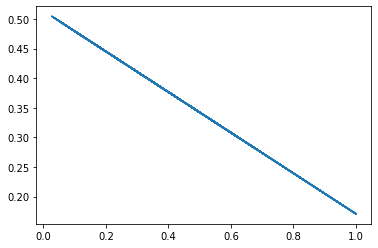

In [ ]:
x1 = np.array(X_test['nox'])
y1 = np.array(y_pred)
m,b=np.polyfit(x1,y1,1)
plt.plot(x1, m*x1 + b)

**Random Forest Regressor Model**

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
226,0.724444,0.924667
292,0.508889,0.494667
90,0.391111,0.384444
373,0.195556,0.145556
273,0.671111,0.780444
...,...,...
349,0.480000,0.485111
212,0.386667,0.373333
156,0.180000,0.247778
480,0.400000,0.348444


**Displaying The R2 Score to calculate Random Forest Regressor Model Accuracy**

In [ ]:

print(metrics.mean_absolute_error(Y_test,y_pred))
print(metrics.mean_squared_error(Y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print(metrics.r2_score(Y_test,y_pred))

0.04887581699346406
0.004895221496005809
0.06996585950308772
0.8733895298130578


In [ ]:
x1 = np.array(X_test['nox'])
y1 = np.array(y_pred)
m,b=np.polyfit(x1,y1,1)
print(m)
print(b)

-0.32086748449427516
0.5006501315172718


**Plotting The Regression Line**

Text(0, 0.5, 'Median Value')

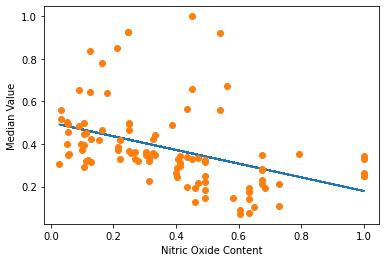

In [ ]:
plt.plot(X_test['nox'], m*X_test['nox'] + b)
plt.plot(X_test['nox'],y_pred,'o')
plt.xlabel("Nitric Oxide Content")
plt.ylabel("Median Value")

**Pairplot**

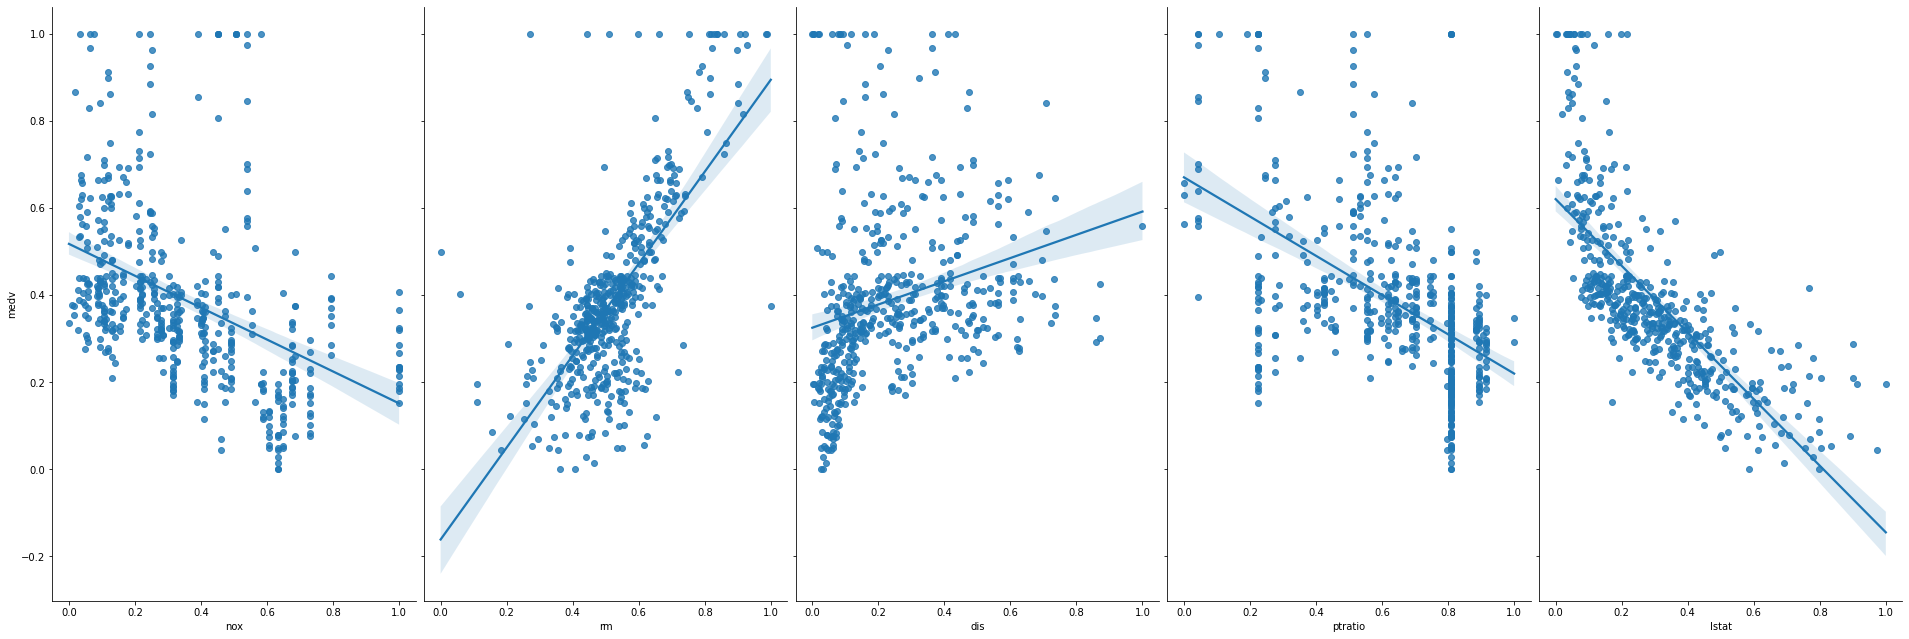

In [ ]:
sns.pairplot(scaled_df, x_vars=['nox','rm','dis','ptratio','lstat'], y_vars='medv', height=9, aspect=0.6, kind='reg')

Conclusion:We have implemented 3 models for House Price Prediction-Linear Regression,SVM Regressor,Random Forest Regressor.Their R2 Scores are-
1. Linear Regression-0.7417818906824027
2. SVM Regressor-0.8518907744570283
3. Random Forest Regressor-0.8733895298130578


We can see that Random Forest Regressor Model has the highest R2 score and thus provides the highest accuracy for Boston House Prediction for the given features.



